主题：通过微博数据对各大航空公司的公众情感倾向以及服务质量进行分析

# 加载原始数据

## 从mongodb导出的csv文件中加载数据

In [31]:
import pandas as pd
import numpy as np
from snownlp import SnowNLP
from snownlp import sentiment
import matplotlib.pyplot as plt
import matplotlib

df1 = pd.read_csv('weiboposts.csv')
df2 = pd.read_csv('weiboposts_4.6.csv')
df = df1.append(df2)

## 统计爬取的原始数据的数量

In [32]:
# Basic statistics
# 各航空公司微博爬取数
dongNum = len(df[df['airline'] == '东航'])
guoNum = len(df[df['airline'] == '国航'])
nanNum = len(df[df['airline'] == '南航'])
haiNum = len(df[df['airline'] == '海航'])
chunqiuNum = len(df[df['airline'] == '春秋航空'])
guotaiNum = len(df[df['airline'] == '国泰航空'])


print '东航爬取微博 ' + str(dongNum)
print '国航爬取微博 ' + str(guoNum)
print '南航爬取微博 ' + str(nanNum)
print '海航爬取微博 ' + str(haiNum)
print '春秋航空爬取微博 ' + str(chunqiuNum)
print '国泰航空爬取微博 ' + str(guotaiNum)
print '合计数据 ' + str(len(df))
print df.shape
print df.columns

东航爬取微博 2036
国航爬取微博 2051
南航爬取微博 2041
海航爬取微博 2046
春秋航空爬取微博 2028
国泰航空爬取微博 1950
合计数据 12152
(12152, 12)
Index([u'mblogid', u'reposts_count', u'text', u'created_at', u'like_count',
       u'comments_count', u'user_name', u'user_followers', u'user_statuses',
       u'user_gender', u'scheme', u'airline'],
      dtype='object')


# 数据清理

## 根据微博中的非需求关键词清除数据

非需求数据：

1. 南航有异议性，根据‘校园’等关键词清除关于南京航空航天大学的微博 

2. 根据‘就业’，‘校招’等关键词清除各大航空公司校招的微博

In [33]:
df = df.drop_duplicates()         
print df.shape

delete_words = ['校园', '就业', '校招', '南京航空航天大学', '招聘']

df = df[df['text'].str.contains(delete_words[0]) == False]
df = df[df['text'].str.contains(delete_words[1]) == False]
df = df[df['text'].str.contains(delete_words[2]) == False]
df = df[df['text'].str.contains(delete_words[3]) == False]
df = df[df['text'].str.contains(delete_words[4]) == False]
print df.shape

(11379, 12)
(10922, 12)


## 清除官博发出的微博

In [35]:
# 清除数据中的空值
df = df.dropna()
print df.shape

# 清除微博中官博的中立性数据
s =  df['user_name'].value_counts()
with open('official','w') as text_file:
    for i in s.values:
        text_file.write(str(i) + "\n")
s = s[s.values > 2]
for i in s.index:
    df = df[df['user_name'] != i]

(10922, 12)


In [23]:
dongNum = len(df[df['airline'] == '东航'])
guoNum = len(df[df['airline'] == '国航'])
nanNum = len(df[df['airline'] == '南航'])
haiNum = len(df[df['airline'] == '海航'])
chunqiuNum = len(df[df['airline'] == '春秋航空'])
guotaiNum = len(df[df['airline'] == '国泰航空'])

print '东航最终微博 ' + str(dongNum)
print '国航最终微博 ' + str(guoNum)
print '南航最终微博 ' + str(nanNum)
print '海航最终微博 ' + str(haiNum)
print '春秋航空最终微博 ' + str(chunqiuNum)
print '国泰航空最终微博 ' + str(guotaiNum)
print '合计数据 ' + str(len(df))

东航最终微博 1116
国航最终微博 1288
南航最终微博 1293
海航最终微博 1068
春秋航空最终微博 1216
国泰航空最终微博 1026
合计数据 7007


In [24]:
# 计算爬取微博的时间范围
# a = df['created_at']
# print a.sort_values()

# 分析微博情感，并统计各大航空公司公众情感倾向

In [1]:
# df.to_csv('sentiment_df', sep='\t', encoding='utf-8')
import pandas as pd
import numpy as np
from snownlp import SnowNLP
from snownlp import sentiment
import matplotlib.pyplot as plt
import matplotlib
df = pd.read_csv('sentiment_df', sep='\t')
df['text'] = df['text'].str.decode('utf-8', 'ignore')

In [2]:
df.index = range(1, df.shape[0] + 1)

In [3]:
def judgeSentiment(sentiments):
    if sentiments >= 0.5:
        return 'positive'
    return 'negative'

df['sentiment'] = df['sentiments'].apply(judgeSentiment)

positive    4403
negative    2604
Name: sentiment, dtype: int64


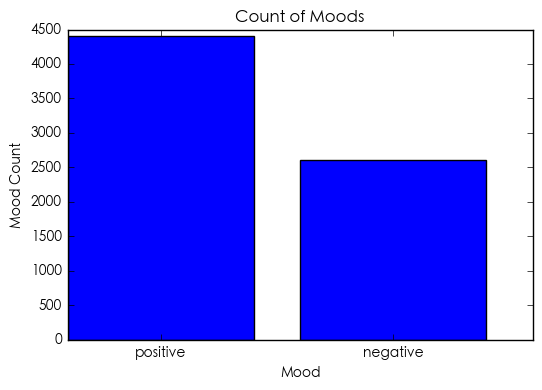

In [4]:
Mood_count = df['sentiment'].value_counts()
print Mood_count
Index = [1,2]
plt.bar(Index,Mood_count)
plt.xticks([1.4, 2.4],['positive','negative'])
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')
plt.show()

positive    603
negative    513
Name: sentiment, dtype: int64
54.0322580645
positive    874
negative    414
Name: sentiment, dtype: int64
67.8571428571
positive    831
negative    462
Name: sentiment, dtype: int64
64.2691415313
positive    573
negative    495
Name: sentiment, dtype: int64
53.6516853933
positive    877
negative    339
Name: sentiment, dtype: int64
72.1217105263
positive    645
negative    381
Name: sentiment, dtype: int64
62.865497076


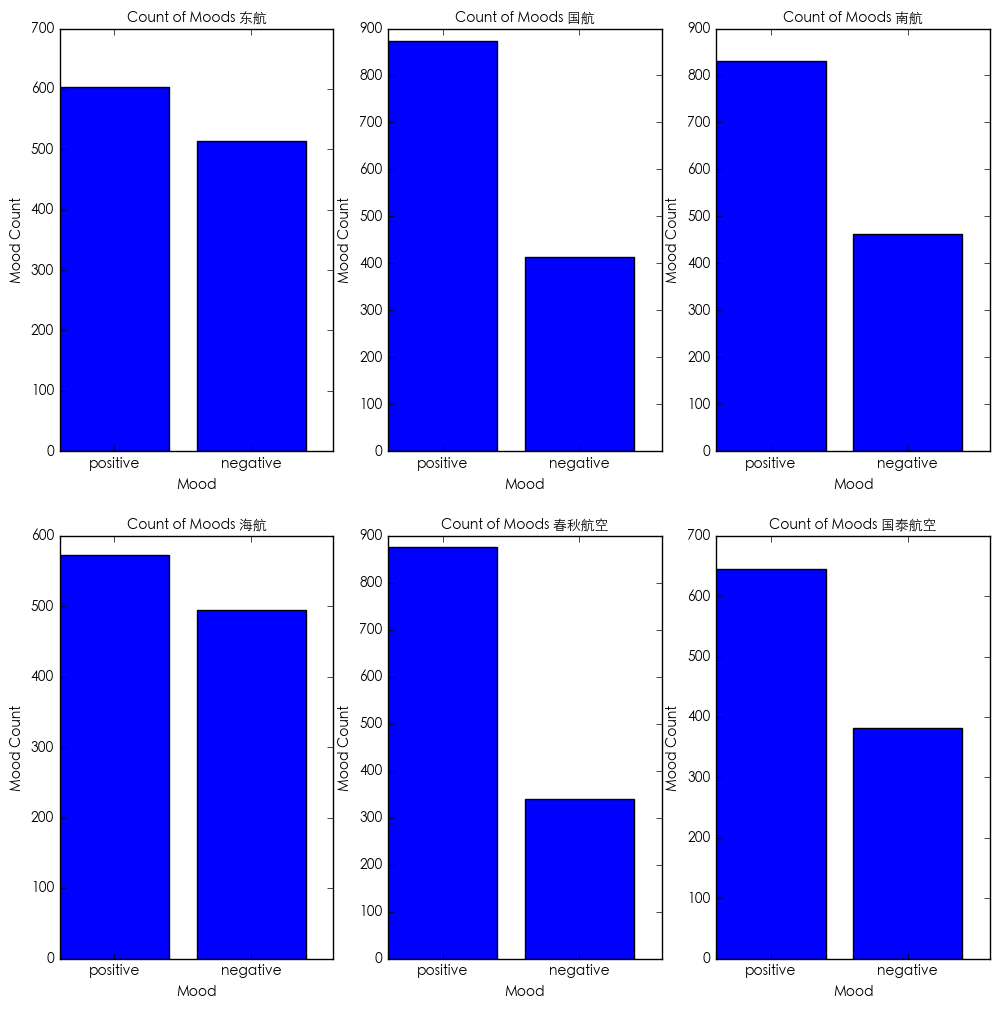

In [5]:
def plot_sub_sentiment(Airline):
    df_airline = df[df['airline'] == Airline]
    count = df_airline['sentiment'].value_counts()
    print count
    print count.loc['positive'] / float((count.loc['positive'] + count.loc['negative'])) * 100
    Index = [1,2]
    plt.bar(Index,count)
    plt.xticks([1.4, 2.4],['positive','negative'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods ' + Airline.decode('utf-8'), fontproperties=zhfont1)

zhfont1 = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
plt.figure(figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('东航')
plt.subplot(232)
plot_sub_sentiment('国航')
plt.subplot(233)
plot_sub_sentiment('南航')
plt.subplot(234)
plot_sub_sentiment('海航')
plt.subplot(235)
plot_sub_sentiment('春秋航空')
plt.subplot(236)
plot_sub_sentiment('国泰航空')
plt.show()


# 提取各大航空公司积极/消极情感中的关键词

## 总览微博上公众关于各大航司积极/消极的点，加深第三部分中情感倾向的理解

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/bd/6lz98zx15tg5_0h9s1jygb0w0000gn/T/jieba.cache
Loading model cost 0.860 seconds.
Prefix dict has been built succesfully.


东航积极情感的关键词


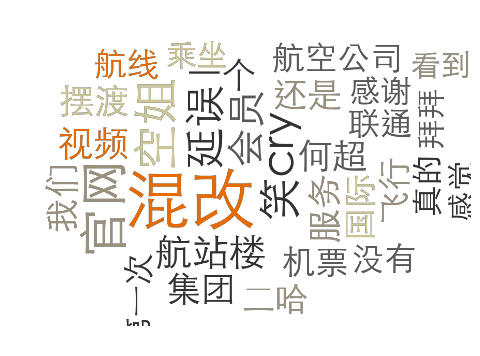

In [6]:
import jieba
import jieba.analyse
from optparse import OptionParser
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
from pytagcloud.colors import COLOR_SCHEMES
import matplotlib.image as mpimg
import random


def getAndPlotPosKeywords(df, airline):
    positive_df = df[df['sentiment'] == 'positive']
    positive_df = positive_df[positive_df['airline'] == airline]
    content = ' '.join(positive_df['text'])
    topK = 30
    withWeight = False
    jieba.load_userdict('userdict')
    jieba.analyse.set_stop_words('stop_words')
    tags = jieba.analyse.extract_tags(content, topK=topK, withWeight=True) 
    tag_list = list()

    for tag in tags:
        tag_list.append((tag[0], int(tag[1] * 1000000)))


    tags_cloud = make_tags(tag_list,
                     minsize=30,
                     maxsize=110,
                     colors=random.choice(COLOR_SCHEMES.values())) 
    img_name = 'tag_cloud_positive_' + airline + '.png'

    create_tag_image(tags_cloud,
                     img_name,
                     background=(0, 0, 0, 0),
                     size=(900, 600),
                     fontname="SimHei")
    
    cloud = mpimg.imread(img_name)
    plt.imshow(cloud)
    plt.axis('off')
    print airline + '积极情感的关键词'
    plt.show()

getAndPlotPosKeywords(df, '东航')

东航消极情感的关键词


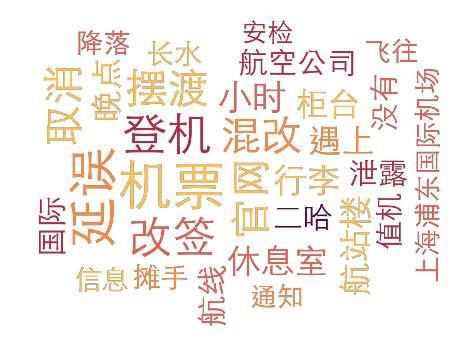

In [7]:
negative_df = df[df['sentiment'] == 'negative']
negative_df = negative_df[negative_df['airline'] == '东航']
content = ' '.join(negative_df['text'])
    
def getAndPlotPosKeywords(df, airline):
    positive_df = df[df['sentiment'] == 'negative']
    positive_df = positive_df[positive_df['airline'] == airline]
    content = ' '.join(positive_df['text'])
    topK = 30
    withWeight = False
    tags = jieba.analyse.extract_tags(content, topK=topK, withWeight=True)
    tag_list = list()

    for tag in tags:
        tag_list.append((tag[0], int(tag[1] * 1000000)))

    tags_cloud = make_tags(tag_list,
                     minsize=15,
                     maxsize=80,
                     colors=random.choice(COLOR_SCHEMES.values())) 
    img_name = 'tag_cloud_negative_' + airline + '.png'

    create_tag_image(tags_cloud,
                     img_name,
                     background=(0, 0, 0, 0),
                     size=(900, 600),
                     fontname="SimHei")
    
    cloud = mpimg.imread(img_name)
    plt.imshow(cloud)
    plt.axis('off')
    print airline + '消极情感的关键词'
    plt.show()

getAndPlotPosKeywords(df, '东航')

# 单词间聚类，尽可能形成句子

## 将博文转化为单词矩阵，并使用tf-idf填充

In [8]:
import jieba
import jieba.analyse
from optparse import OptionParser
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
from pytagcloud.colors import COLOR_SCHEMES
import matplotlib.image as mpimg
import random
import jieba

positive_df = df[df['sentiment'] == 'negative']
positive_df = positive_df[positive_df['airline'] == '春秋航空']
content = ' '.join(positive_df['text'])

TopK = 1000             
words = jieba.analyse.extract_tags(content, topK = TopK, withWeight = False )
words_list = list()

for word in words:
    words_list.append(word)

### 在文本中单词向量的每个位置填的数值不再是词频，而是tf-idf

### 掐头去尾，将过高文档频率的词（>40%），和过小文档频率的词（几次）去掉

|  想法     | 方法          
| ------------- |:-------------:|
| 过大文档频率    |  通过设置stop_words去除高文档频率，对分析结果无关的词 > 40% | 
| 过小文档频率     | 根据具体情况剔除过小文档频率（出现几次）的词 | 


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  

def tokenize_and_stem(post):
    
    seg_list = jieba.cut(post, cut_all=False)
    return seg_list

def makeWordsMatrix(df, keywords, minfreq = 5):
    min = minfreq
    max = len(df) * 0.4
    posts = df['text'].apply(lambda x: jieba.cut(x, cut_all = False))
    synopses = list()
    for post in posts:
        post_str = ' '.join(post)
        synopses.append(post_str)
        
    new_words = []
    for i in range(len(keywords)): 
        frequency = df.text.str.contains(keywords[i])
        frequency = frequency.apply(int)
        if frequency.sum() >= min and frequency.sum() <= max:
            new_words.append(keywords[i])
    
    vectorizer=CountVectorizer()
    transformer=TfidfTransformer()
    
    tfidf = transformer.fit_transform(vectorizer.fit_transform(synopses))
    word = vectorizer.get_feature_names()
    tfidf = tfidf.todense()
    
    
    tfidfMatrix = pd.DataFrame(tfidf, columns = word)
    termDocumentMatrix =  tfidfMatrix.T
    
    termDocumentMatrix = termDocumentMatrix.loc[new_words]
    termDocumentMatrix = termDocumentMatrix.dropna()
    return termDocumentMatrix

positive_df.index = range(1, positive_df.shape[0] + 1) 
new_df = makeWordsMatrix(positive_df, words_list)
new_df

,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
航线,0.0,0.000000,0.078659,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
托运,0.0,0.000000,0.000000,0.000000,0.087889,0.0,0.000000,0.134464,0.000000,0.000000,...,0.000000,0.000000,0.088617,0.0,0.000000,0.000000,0.0,0.075105,0.000000,0.000000
航空公司,0.0,0.000000,0.071659,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.082697,...,0.085166,0.076937,0.000000,0.0,0.000000,0.077998,0.0,0.000000,0.000000,0.000000
机票,0.0,0.000000,0.000000,0.000000,0.090367,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.184852
行李,0.0,0.000000,0.000000,0.000000,0.182038,0.0,0.000000,0.139253,0.000000,0.000000,...,0.000000,0.087461,0.000000,0.0,0.000000,0.000000,0.0,0.077780,0.000000,0.186186
日起,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
曼谷,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
开通,0.0,0.000000,0.170511,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
延误,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
扬州,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


## 计算单词间相关性，获得与指定单词（比如‘服务’）相关性最高的单词，并对这些单词进行聚类

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

# 欧几内得距离
def calEuclidean(df, words): 
    array = euclidean_distances(df, df)
    euclidean_df = pd.DataFrame(data = array, index = words, columns = words)
    return euclidean_df

# 余弦距离
def calCosine_distances(df):
    array = cosine_distances(df, df)
    cosine_df = pd.DataFrame(data = array, index = df.index, columns = df.index)
    return cosine_df

def getRelevanceWordsWeiboByWord(df, word, relevanceWord):
    keyword_df = df[df['text'].str.contains(word)]
    return keyword_df[keyword_df['text'].str.contains(relevanceWord)]


In [16]:
# def plotTheMostRelevance(relevance_words):
#     G = nx.Graph()
#     G.add_node(relevance_words.index[0])
#     for i in range(len(relevance_words) - 1):
#         G.add_edge(relevance_words.index[0], relevance_words.index[i + 1], len = relevance_words[i + 1] * 10)
        
#     nx.draw(G, with_labels = True)
#     plt.show()

airline = '春秋航空'
sentiment = 'negative'
word = u'服务'
if sentiment == 'positive' or sentiment == 'negative':
    
    sentiment_df = df[df['sentiment'] == sentiment]
    sentiment_df = sentiment_df[sentiment_df['airline'] == airline]
    content = ' '.join(sentiment_df['text'])
else:
    sentiment_df = df[df['airline'] == airline]
    content = ' '.join(sentiment_df['text'])


TopK = 1000
words = jieba.analyse.extract_tags(content, topK = TopK, withWeight = False )
words_list = list()

for wd in words:
    words_list.append(wd)
    
sentiment_df.index = range(1, sentiment_df.shape[0] + 1)   
new_df = makeWordsMatrix(sentiment_df, words_list, 5)
    
#     eulidean_df = calEuclidean(new_df, words_list)
#     #return eulidean_df
#     word_series = eulidean_df.loc[word, :]

cosine_df = calCosine_distances(new_df)


word_series = cosine_df.loc[word, :]

relevance_words = word_series.sort_values()
top21Words = relevance_words[1:22]
print top21Words    

素质    0.630684
失望    0.647317
要求    0.654198
只是    0.658702
通过    0.674751
廉价    0.702276
空姐    0.718683
我们    0.721257
表示    0.723460
空乘    0.746762
脑子    0.763817
这样    0.768061
行程    0.771312
培训    0.773956
不好    0.783902
居然    0.790560
消费    0.796739
你们    0.797606
延误    0.800867
同时    0.804342
等到    0.805631
Name: 服务, dtype: float64


### 进行层次性聚类探究相似性最高词之间的关系

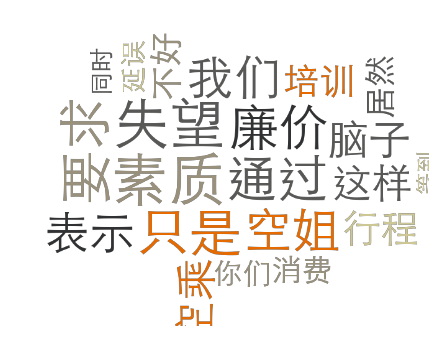

In [17]:
tag_list = list()

weights = range(1, len(top21Words) + 1)
reverse_weights = weights[::-1]
tag_words = pd.Series(reverse_weights, index = top21Words.index)

for index,value in tag_words.iteritems():
    tag_list.append((index, value * 1000))

tags_cloud = make_tags(tag_list,
                     minsize=30,
                     maxsize=90,
                     colors=random.choice(COLOR_SCHEMES.values())) 
img_name = 'tag_word_positive_' + airline  +  '.png'

create_tag_image(tags_cloud,
                     img_name,
                     background=(0, 0, 0, 0),
                     size=(750, 500),
                     fontname="SimHei")
    
cloud = mpimg.imread(img_name)
plt.imshow(cloud)
plt.axis('off')
plt.show()

CPU times: user 831 µs, sys: 70 µs, total: 901 µs
Wall time: 458 µs


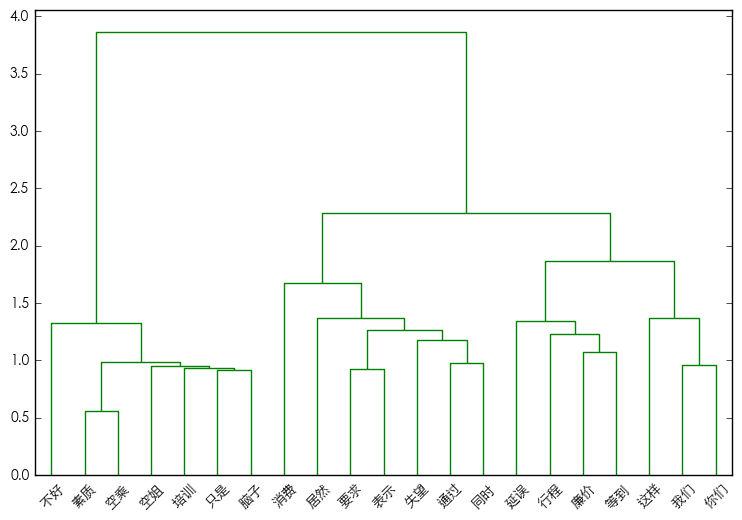

In [18]:
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
import jieba
import matplotlib.image as mpimg


new_df = new_df.loc[top21Words.index]

cosine_df = calCosine_distances(new_df)

%time ward(cosine_df) 
linkage_matrix = ward(cosine_df)  
fig, ax = plt.subplots(figsize=(9, 6)) # set size
    
max_d = 200   #above line color is same 
ax = dendrogram(linkage_matrix, orientation="top", labels = top21Words.index, color_threshold = max_d)
plt.savefig(airline + '.png', dpi=600)
plt.show()
# print  fcluster(linkage_matrix, 200, criterion='distance')

### 进一步提取分析

In [19]:
relevanceWord = u'空调'
weibos = getRelevanceWordsWeiboByWord(sentiment_df, word, relevanceWord)
print weibos

     Unnamed: 0           mblogid  reposts_count  \
114         559  4063557685214219              1   
184         824  4074632997489644              0   

                                                  text  \
114  @山东航空公司果然一如既往的不负众望飞机居然乘客都上了还不开空调你们省钱就省成这样了要不是时...   
184  东航昆明长水机场的服务真心超级差，从22:50的飞机被延误到3:50，中间没有任何工作人员提...   

                   created_at  like_count  comments_count user_name  \
114  2017-01-13T12:38:00.000Z           1               2     一口酱牛肉   
184  2017-02-13T02:07:00.000Z           1               0    浅浅清清浅浅   

     user_followers  user_statuses user_gender  \
114             257           3265           m   
184             597           5737           f   

                                                scheme airline    sentiments  \
114  http://m.weibo.cn/status/EqFqolSsj?mblogid=EqF...      东航  3.736501e-03   
184  http://m.weibo.cn/status/EvjxNvqoI?mblogid=Evj...      东航  9.255893e-07   

    sentiment  
114  negative  
184  negative  


# 从Skytrax获取各大航空公司评论得分，验证分析结果。

（评论得分数据来源 http://www.airlinequality.com/review-pages/a-z-airline-reviews/airline-review-ratings ）

东航5分的服务最相关词评价


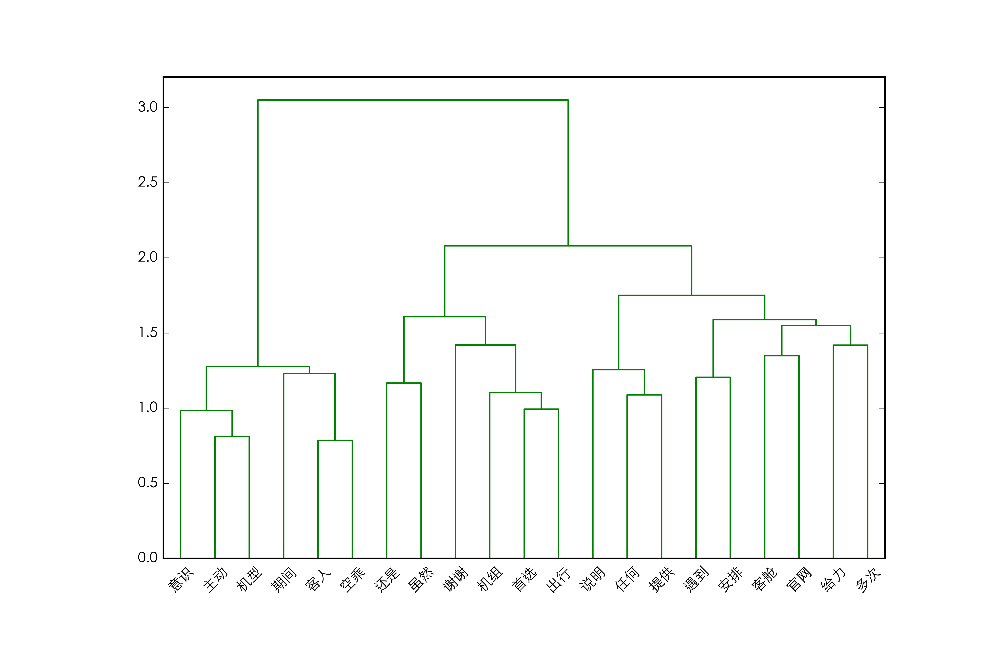

国航4分的服务最相关词评价


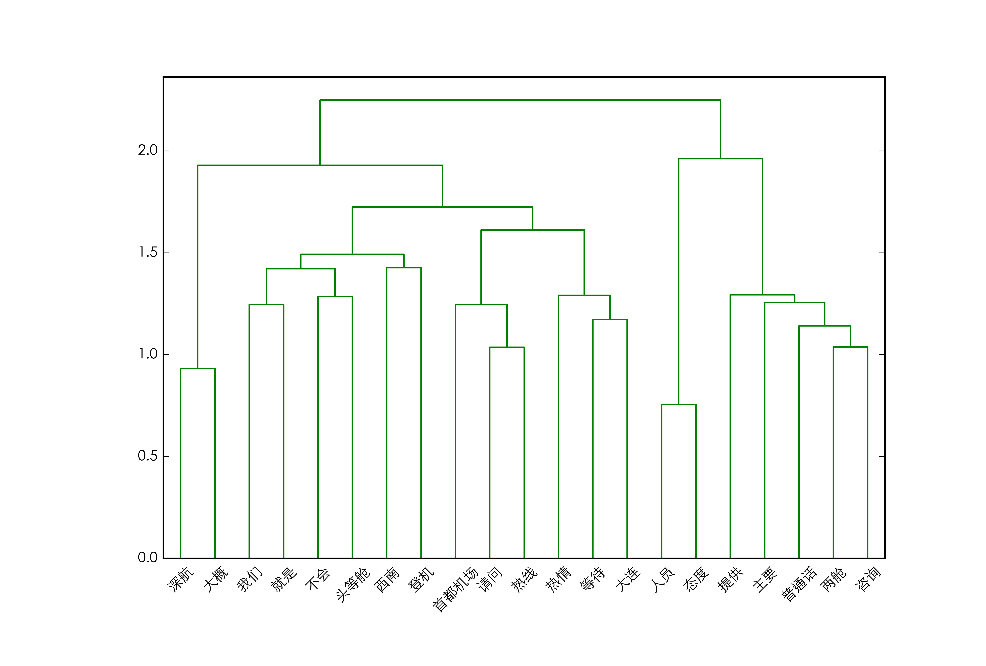

南航8分的服务最相关词评价


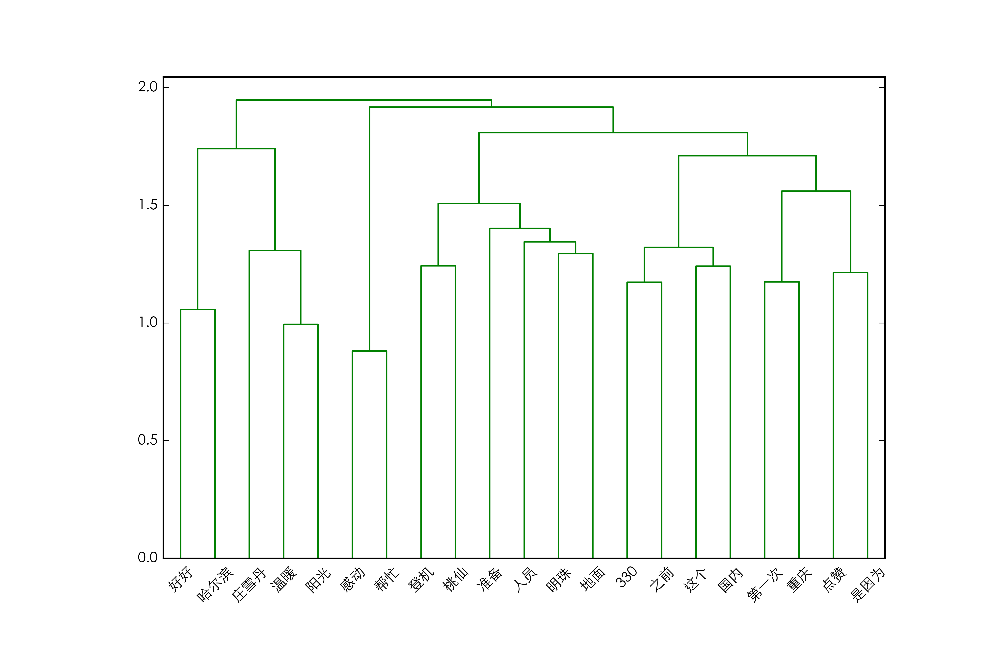

海航8分的服务最相关词评价


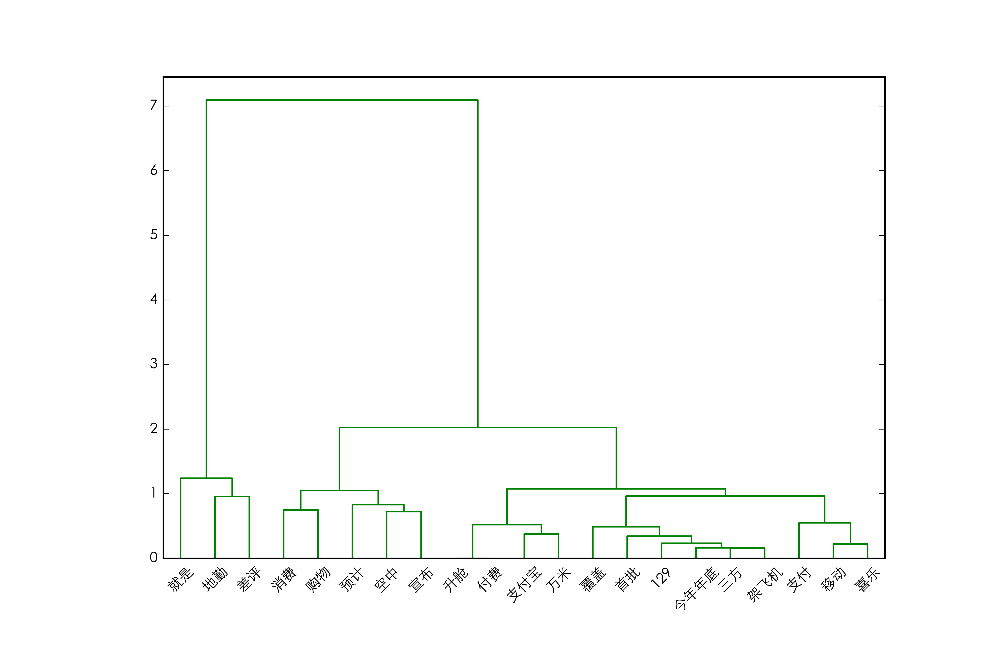

春秋航空5分的服务最相关词评价


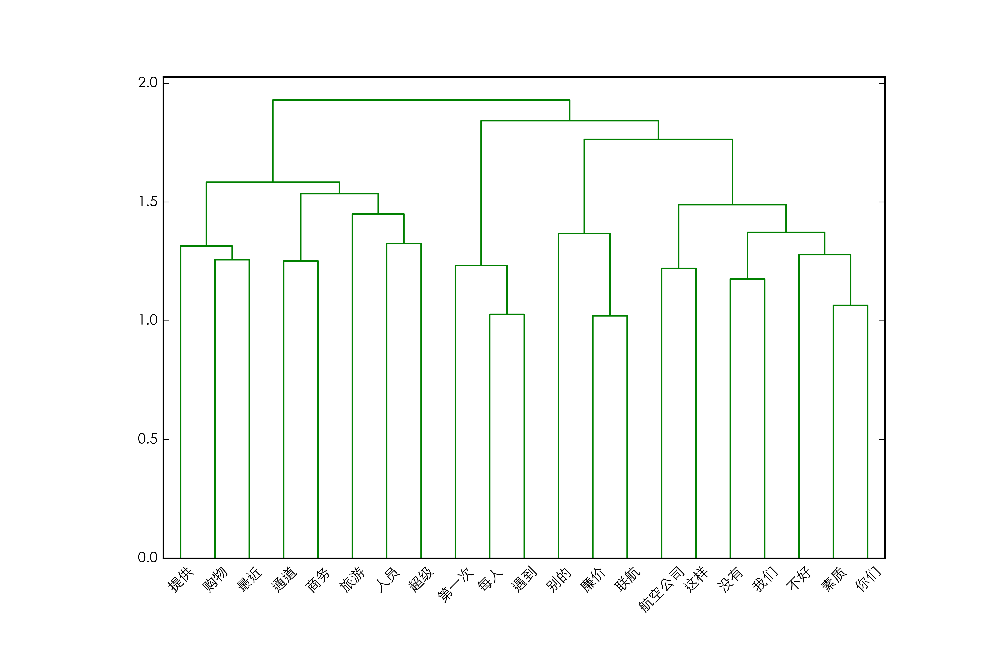

国泰航空7分的服务最相关词评价


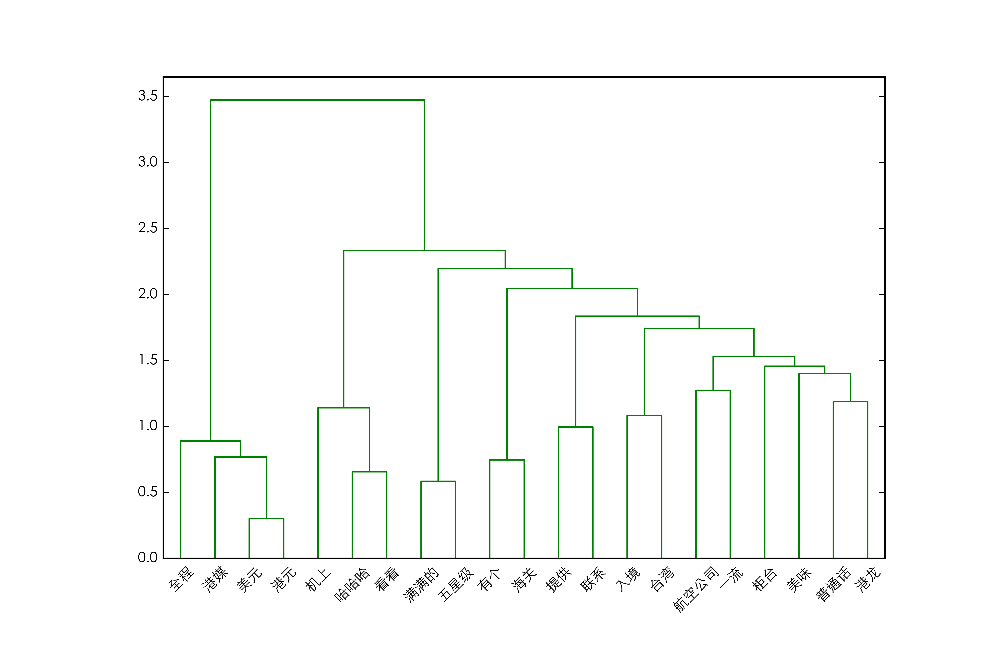

In [57]:
# score max 10
airline_scores = {'东航': 5,
                  '国航': 4,
                  '南航': 8,
                  '海航': 8,
                  '春秋航空': 5,
                  '国泰航空': 7}

img_name_dong = '东航.png'
img_name_guo = '国航.png'
img_name_nan = '南航.png'
img_name_hai = '海航.png'
img_name_chunqiu = '春秋航空.png'
img_name_guotai = '国泰航空.png'

print ('东航5分的服务最相关词评价')
fig, ax = plt.subplots(figsize=(12, 10)) # set size
cloud = mpimg.imread(img_name_dong)
plt.imshow(cloud)
plt.axis('off')
plt.show()

print ('国航4分的服务最相关词评价')
fig, ax = plt.subplots(figsize=(12, 10)) # set size
cloud = mpimg.imread(img_name_guo)
plt.imshow(cloud)
plt.axis('off')
plt.show()

print ('南航8分的服务最相关词评价')
fig, ax = plt.subplots(figsize=(12, 10)) # set size
cloud = mpimg.imread(img_name_nan)
plt.imshow(cloud)
plt.axis('off')
plt.show()

print ('海航8分的服务最相关词评价')
fig, ax = plt.subplots(figsize=(12, 10)) # set size
cloud = mpimg.imread(img_name_hai)
plt.imshow(cloud)
plt.axis('off')
plt.show()

print ('春秋航空5分的服务最相关词评价')
fig, ax = plt.subplots(figsize=(12, 10)) # set size
cloud = mpimg.imread(img_name_chunqiu)
plt.imshow(cloud)
plt.axis('off')
plt.show()

print ('国泰航空7分的服务最相关词评价')
fig, ax = plt.subplots(figsize=(12, 10)) # set size
cloud = mpimg.imread(img_name_guotai)
plt.imshow(cloud)
plt.axis('off')
plt.show()